In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot
import cufflinks as cf
import seaborn as sns


%matplotlib inline

In [3]:
df = pd.read_excel('Data_Train.xlsx')

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.shape

(10683, 11)

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
import pandas_profiling as pf

In [10]:
pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
df.dropna(how="any",inplace=True)

In [12]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Day_of_Journey']=(df['Date_of_Journey']).dt.day
df['Month_of_Journey']=(df['Date_of_Journey']).dt.month


C:\Users\biltu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\biltu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\biltu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\biltu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\biltu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning:

Parsing '24/04/2019' in DD/MM/YYYY format. Pro

In [14]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [15]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [16]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [17]:

#covert to datetime
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [18]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [19]:
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [20]:
#we can now drop the 'Arrival_Time'

df.drop(["Arrival_Time"],axis=1,inplace=True)
#we can now drop the 'Dep_Time'

df.drop(["Dep_Time"],axis=1,inplace=True)

In [21]:
duration=df['Duration'].str.split(' ',expand=True) #split duration datapoints based on space ' '
duration[1].fillna('00m',inplace=True)   #fill all "NAN" with '00m'
df['duration_hr']=duration[0].apply(lambda x: x[:-1]) #select the item at index o and leave the last one (in this case the 'h')
df['duration_min']=duration[1].apply(lambda x: x[:-1]) #select the item at index 1 and leave the last one (in this case the 'm')
#we can now drop the 'Duration'

df.drop(["Duration"],axis=1,inplace=True)

In [22]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [23]:
cf.set_config_file(theme='ggplot',sharing='public',offline=True)

In [24]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

C:\Users\biltu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers Premium economy'),
  Text(3, 0, 'Multiple carriers'),
  Text(4, 0, 'Air India'),
  Text(5, 0, 'Vistara Premium economy'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'GoAir'),
  Text(8, 0, 'IndiGo'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'SpiceJet'),
  Text(11, 0, 'Trujet')])

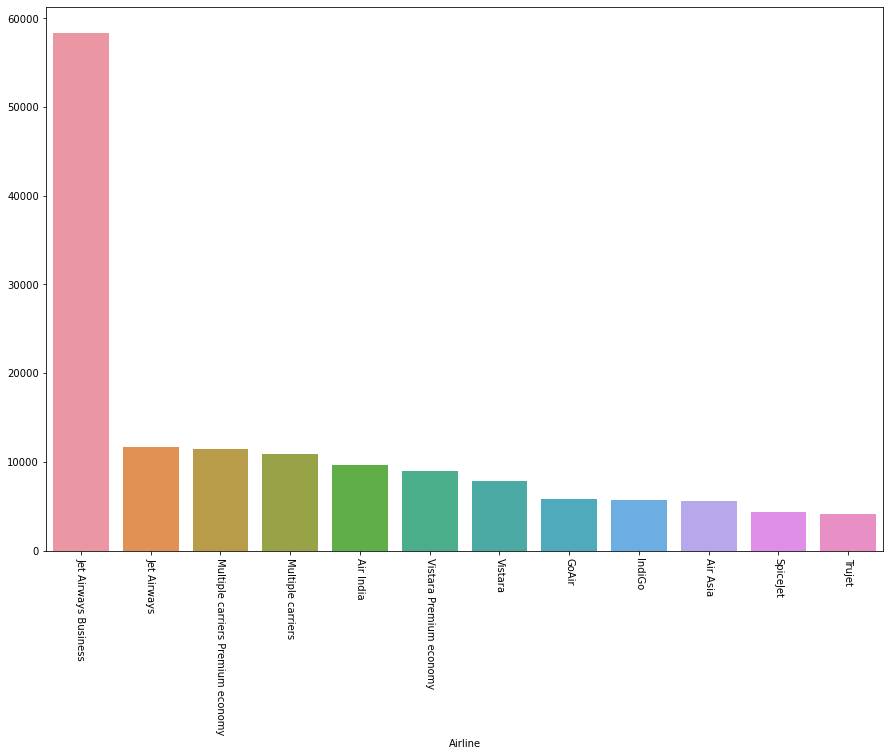

In [25]:
Airprices=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(Airprices.index,Airprices.values)
plt.xticks(rotation=270)

In [26]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

<function matplotlib.pyplot.show(close=None, block=None)>

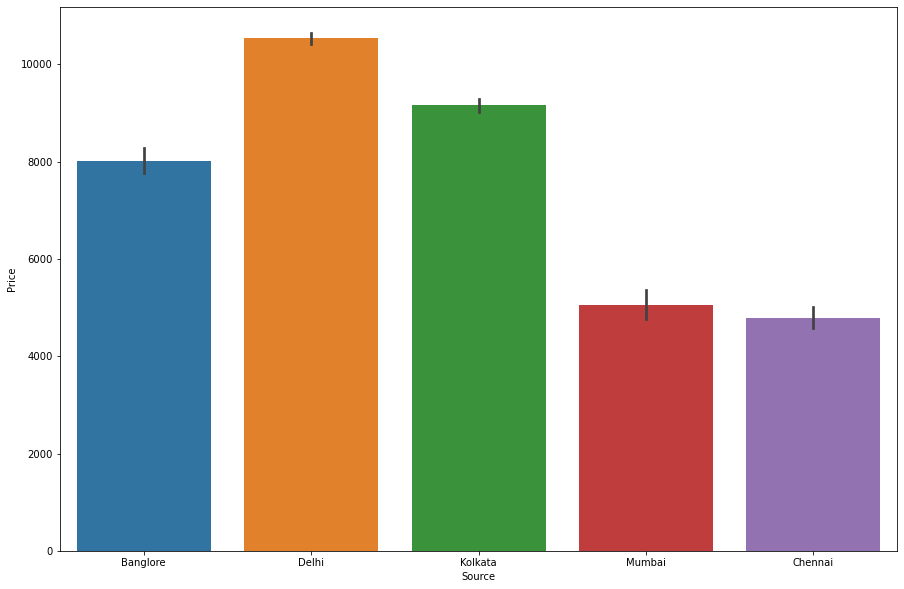

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

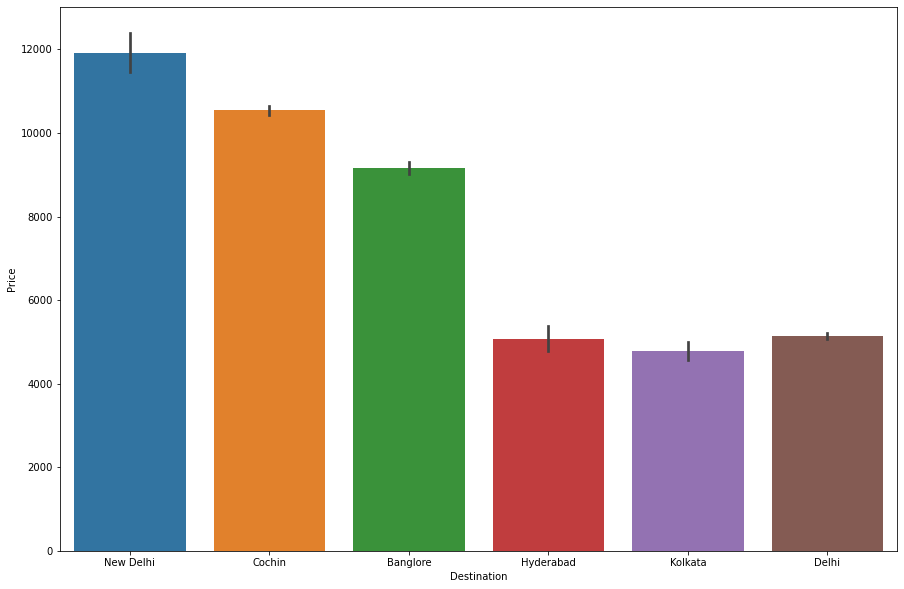

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show

In [29]:
for i in df:
    df.replace('New Delhi','Delhi',inplace=True)

In [30]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

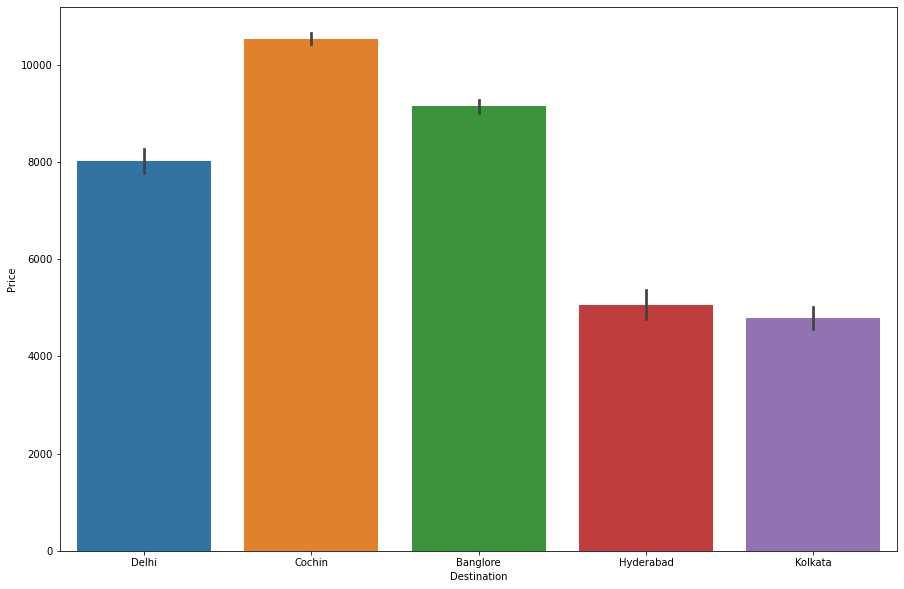

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show

<AxesSubplot:>

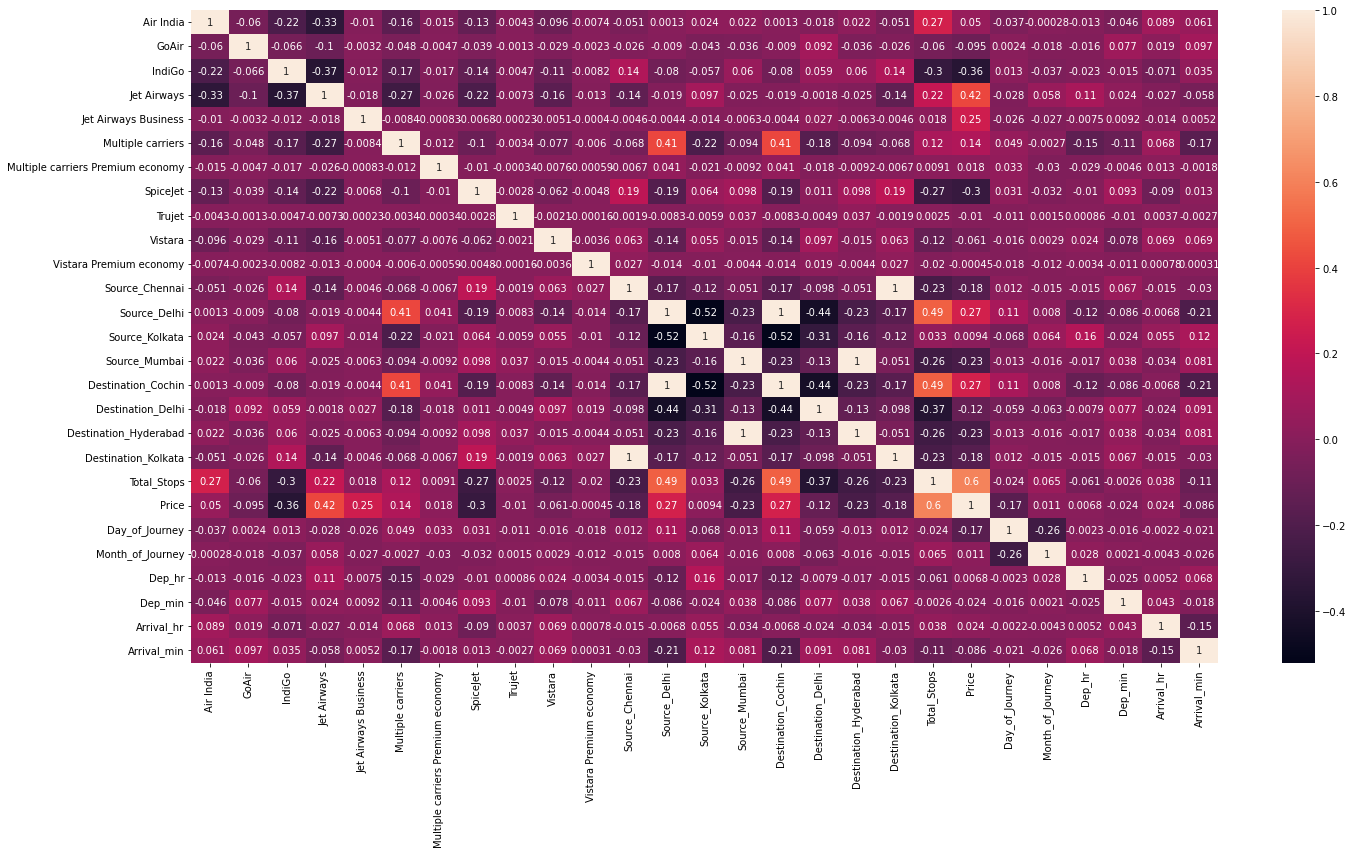

In [35]:
plt.figure(figsize=(23,12))
sns.heatmap(df.corr(),annot=True)

In [33]:
#Handling Categorical Values 
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)
# print(df['Source'].value_counts())
# print(df['Destination'].value_counts())

source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)

In [34]:
df

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,No info,4107,4,9,19,55,22,25,2,30
10679,1,0,0,0,0,0,0,0,0,0,...,No info,4145,27,4,20,45,23,20,2,35
10680,0,0,0,1,0,0,0,0,0,0,...,No info,7229,27,4,8,20,11,20,3,00
10681,0,0,0,0,0,0,0,0,0,1,...,No info,12648,3,1,11,30,14,10,2,40


In [36]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min', 'duration_hr',
       'duration_min'],
      dtype='object')

In [38]:
df.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

In [39]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,2,7662,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,2,13882,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,1,6218,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,1,13302,3,1,16,50,21,35,4,45


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Air India                          10682 non-null  uint8 
 1   GoAir                              10682 non-null  uint8 
 2   IndiGo                             10682 non-null  uint8 
 3   Jet Airways                        10682 non-null  uint8 
 4   Jet Airways Business               10682 non-null  uint8 
 5   Multiple carriers                  10682 non-null  uint8 
 6   Multiple carriers Premium economy  10682 non-null  uint8 
 7   SpiceJet                           10682 non-null  uint8 
 8   Trujet                             10682 non-null  uint8 
 9   Vistara                            10682 non-null  uint8 
 10  Vistara Premium economy            10682 non-null  uint8 
 11  Source_Chennai                     10682 non-null  uint8 
 12  Sour

In [41]:
x=df.drop(['Price',],axis=1)
y=df['Price']

In [42]:
x.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,0,2,6,9,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,0,1,5,12,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,0,1,3,1,16,50,21,35,4,45


In [43]:
from sklearn.ensemble import ExtraTreesRegressor
ET_Model=ExtraTreesRegressor()
ET_Model.fit(x,y)

ExtraTreesRegressor()

<AxesSubplot:>

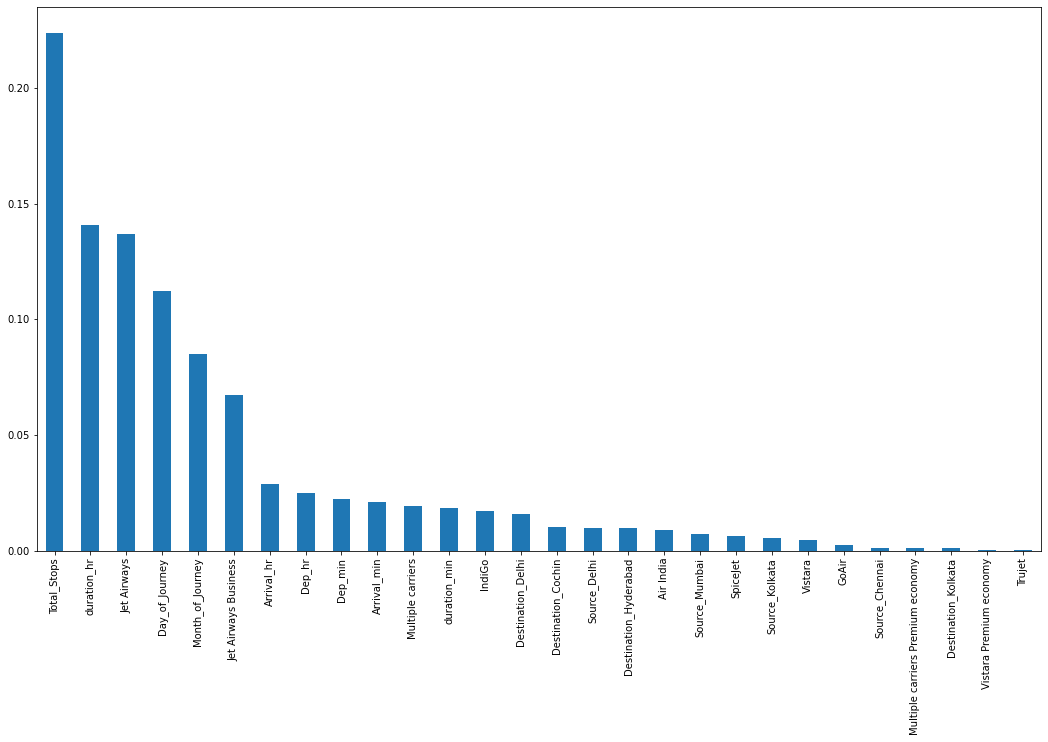

In [44]:
pd.Series(ET_Model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))

In [45]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [46]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)
y_predict=ET_Model.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7669921433340721

In [47]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor()
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
r2_score(y_test,y_predict)

0.7953239720717589

In [50]:
from catboost import CatBoostRegressor

cat=CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.057463
0:	learn: 4465.7280757	total: 60.1ms	remaining: 1m
1:	learn: 4317.7245126	total: 62.2ms	remaining: 31s
2:	learn: 4167.9871081	total: 64.6ms	remaining: 21.5s
3:	learn: 4030.4839609	total: 66.9ms	remaining: 16.7s
4:	learn: 3906.4844760	total: 69.2ms	remaining: 13.8s
5:	learn: 3785.4580402	total: 71.3ms	remaining: 11.8s
6:	learn: 3673.8662552	total: 73.4ms	remaining: 10.4s
7:	learn: 3582.0533069	total: 75.7ms	remaining: 9.39s
8:	learn: 3495.5629367	total: 78ms	remaining: 8.58s
9:	learn: 3404.7478335	total: 80.1ms	remaining: 7.93s
10:	learn: 3325.1004431	total: 82.3ms	remaining: 7.4s
11:	learn: 3254.1004651	total: 84.5ms	remaining: 6.96s
12:	learn: 3184.6084064	total: 86.7ms	remaining: 6.58s
13:	learn: 3122.3064005	total: 89ms	remaining: 6.26s
14:	learn: 3067.6550706	total: 91.1ms	remaining: 5.98s
15:	learn: 3014.5169632	total: 93.4ms	remaining: 5.74s
16:	learn: 2962.4252595	total: 95.5ms	remaining: 5.52s
17:	learn: 2920.1931240	total: 97.9ms	remaining: 5.34s


186:	learn: 1898.5304244	total: 507ms	remaining: 2.2s
187:	learn: 1897.0739098	total: 509ms	remaining: 2.2s
188:	learn: 1894.5016873	total: 511ms	remaining: 2.19s
189:	learn: 1892.5209273	total: 514ms	remaining: 2.19s
190:	learn: 1890.9588410	total: 516ms	remaining: 2.19s
191:	learn: 1889.7128491	total: 519ms	remaining: 2.18s
192:	learn: 1888.8885955	total: 521ms	remaining: 2.18s
193:	learn: 1888.0018393	total: 524ms	remaining: 2.17s
194:	learn: 1887.0114729	total: 526ms	remaining: 2.17s
195:	learn: 1886.1149584	total: 529ms	remaining: 2.17s
196:	learn: 1885.0633608	total: 531ms	remaining: 2.16s
197:	learn: 1883.5795929	total: 533ms	remaining: 2.16s
198:	learn: 1881.4375386	total: 536ms	remaining: 2.15s
199:	learn: 1880.6406972	total: 538ms	remaining: 2.15s
200:	learn: 1879.1601652	total: 541ms	remaining: 2.15s
201:	learn: 1878.3766642	total: 543ms	remaining: 2.15s
202:	learn: 1874.8103918	total: 546ms	remaining: 2.14s
203:	learn: 1873.2498095	total: 548ms	remaining: 2.14s
204:	learn: 

384:	learn: 1689.4345475	total: 1.02s	remaining: 1.63s
385:	learn: 1688.3047188	total: 1.02s	remaining: 1.62s
386:	learn: 1687.3647544	total: 1.02s	remaining: 1.62s
387:	learn: 1686.8507705	total: 1.02s	remaining: 1.62s
388:	learn: 1685.8128703	total: 1.03s	remaining: 1.61s
389:	learn: 1684.8767186	total: 1.03s	remaining: 1.61s
390:	learn: 1683.4689024	total: 1.03s	remaining: 1.61s
391:	learn: 1682.5854198	total: 1.03s	remaining: 1.61s
392:	learn: 1681.7591755	total: 1.04s	remaining: 1.6s
393:	learn: 1680.9414964	total: 1.04s	remaining: 1.6s
394:	learn: 1680.2388543	total: 1.04s	remaining: 1.6s
395:	learn: 1678.9097571	total: 1.04s	remaining: 1.59s
396:	learn: 1678.3900821	total: 1.05s	remaining: 1.59s
397:	learn: 1677.7496669	total: 1.05s	remaining: 1.59s
398:	learn: 1676.2792415	total: 1.05s	remaining: 1.59s
399:	learn: 1675.1193211	total: 1.05s	remaining: 1.58s
400:	learn: 1674.4968940	total: 1.06s	remaining: 1.58s
401:	learn: 1673.3296305	total: 1.06s	remaining: 1.58s
402:	learn: 1

593:	learn: 1551.9465083	total: 1.53s	remaining: 1.05s
594:	learn: 1551.9413036	total: 1.54s	remaining: 1.05s
595:	learn: 1551.2965977	total: 1.54s	remaining: 1.04s
596:	learn: 1550.7403946	total: 1.54s	remaining: 1.04s
597:	learn: 1550.1027460	total: 1.54s	remaining: 1.04s
598:	learn: 1550.0974462	total: 1.55s	remaining: 1.04s
599:	learn: 1549.4200649	total: 1.55s	remaining: 1.03s
600:	learn: 1548.9302156	total: 1.55s	remaining: 1.03s
601:	learn: 1548.5106045	total: 1.55s	remaining: 1.03s
602:	learn: 1548.2659990	total: 1.56s	remaining: 1.02s
603:	learn: 1547.9753359	total: 1.56s	remaining: 1.02s
604:	learn: 1547.0668429	total: 1.56s	remaining: 1.02s
605:	learn: 1546.7331903	total: 1.56s	remaining: 1.02s
606:	learn: 1546.2364320	total: 1.57s	remaining: 1.01s
607:	learn: 1544.9458626	total: 1.57s	remaining: 1.01s
608:	learn: 1544.1553853	total: 1.57s	remaining: 1.01s
609:	learn: 1543.5227193	total: 1.57s	remaining: 1.01s
610:	learn: 1543.1574970	total: 1.58s	remaining: 1s
611:	learn: 1

808:	learn: 1461.6465642	total: 2.05s	remaining: 485ms
809:	learn: 1461.4781258	total: 2.06s	remaining: 482ms
810:	learn: 1461.1209006	total: 2.06s	remaining: 479ms
811:	learn: 1460.7002941	total: 2.06s	remaining: 477ms
812:	learn: 1460.3450874	total: 2.06s	remaining: 474ms
813:	learn: 1459.8216877	total: 2.06s	remaining: 472ms
814:	learn: 1459.2279638	total: 2.07s	remaining: 469ms
815:	learn: 1458.8274393	total: 2.07s	remaining: 467ms
816:	learn: 1458.6059761	total: 2.07s	remaining: 464ms
817:	learn: 1458.6040278	total: 2.07s	remaining: 462ms
818:	learn: 1458.6003278	total: 2.08s	remaining: 459ms
819:	learn: 1457.5833269	total: 2.08s	remaining: 456ms
820:	learn: 1457.3004243	total: 2.08s	remaining: 454ms
821:	learn: 1456.8507487	total: 2.08s	remaining: 451ms
822:	learn: 1456.3956979	total: 2.09s	remaining: 449ms
823:	learn: 1455.6548069	total: 2.09s	remaining: 446ms
824:	learn: 1455.1132909	total: 2.09s	remaining: 444ms
825:	learn: 1454.7832722	total: 2.09s	remaining: 441ms
826:	learn

In [51]:
cat_pred=cat.predict(X_test)
r2_score(y_test,cat_pred)

0.8273858089678572

In [52]:
X_train[['duration_hr','duration_min']]=X_train[['duration_hr','duration_min']].astype(int)
X_test[['duration_hr','duration_min']]=X_test[['duration_hr','duration_min']].astype(int)

In [53]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train,y_train)

LGBMRegressor()

In [54]:
lgb_pred=lgb_model.predict(X_test)
r2_score(y_test,lgb_pred)

0.8030064936005559

In [55]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
r2_score(y_test,xgb_pred)

0.8212496825906317

In [57]:
import pickle 
# Saving model to disk
pickle.dump(cat, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))